#### Data Preprocessing

In [285]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_1 = pd.read_csv('Audible_Catlog.csv')
df_2 = pd.read_csv('Audible_Catlog_Advanced_Features.csv')

In [286]:
df_1.head()

,Book Name,Author,Rating,Number of Reviews,Price
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,313.0,10080.0
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3658.0,615.0
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20174.0,10378.0
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4614.0,888.0
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4302.0,1005.0


In [287]:
df_2.head()

,Book Name,Author,Rating,Number of Reviews,Price,Description,Listening Time,Ranks and Genre
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,371.0,10080,"Over the past three years, Jay Shetty has beco...",10 hours and 54 minutes,",#1 in Audible Audiobooks & Originals (See Top..."
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3682.0,615,Brought to you by Penguin.,3 hours and 23 minutes,",#2 in Audible Audiobooks & Originals (See Top..."
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20306.0,10378,"In this generation-defining self-help guide, a...",5 hours and 17 minutes,",#3 in Audible Audiobooks & Originals (See Top..."
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4678.0,888,Brought to you by Penguin.,5 hours and 35 minutes,",#5 in Audible Audiobooks & Originals (See Top..."
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4308.0,1005,"Stop going through life, Start growing throug...",6 hours and 25 minutes,",#6 in Audible Audiobooks & Originals (See Top..."


In [288]:
df_final = pd.merge(df_1, df_2, on=['Book Name','Author'], how='inner')

In [289]:
df_final

,Book Name,Author,Rating_x,Number of Reviews_x,Price_x,Rating_y,Number of Reviews_y,Price_y,Description,Listening Time,Ranks and Genre
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,313.0,10080.0,4.9,371.0,10080,"Over the past three years, Jay Shetty has beco...",10 hours and 54 minutes,",#1 in Audible Audiobooks & Originals (See Top..."
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3658.0,615.0,4.6,3682.0,615,Brought to you by Penguin.,3 hours and 23 minutes,",#2 in Audible Audiobooks & Originals (See Top..."
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20174.0,10378.0,4.4,20306.0,10378,"In this generation-defining self-help guide, a...",5 hours and 17 minutes,",#3 in Audible Audiobooks & Originals (See Top..."
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4614.0,888.0,4.6,4678.0,888,Brought to you by Penguin.,5 hours and 35 minutes,",#5 in Audible Audiobooks & Originals (See Top..."
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4302.0,1005.0,4.6,4308.0,1005,"Stop going through life, Start growing throug...",6 hours and 25 minutes,",#6 in Audible Audiobooks & Originals (See Top..."
...,...,...,...,...,...,...,...,...,...,...,...
4246,The Prophet & The Wanderer,Khalil Gibran,4.1,6.0,539.0,4.1,6.0,539,"Sorry, we just need to make sure you're not a ...",-1,-1
4247,Make Today Count: The Secret of Your Success I...,John C. Maxwell,4.7,301.0,500.0,4.7,307.0,500,"Sorry, we just need to make sure you're not a ...",-1,-1
4248,Make Today Count: The Secret of Your Success I...,John C. Maxwell,4.7,301.0,500.0,4.7,307.0,500,"Sorry, we just need to make sure you're not a ...",-1,-1
4249,वॉयर - एक कामुक लघुकथा,सेसिलि रोसडैल,-1.0,NaN,65.0,-1.0,NaN,65,"Sorry, we just need to make sure you're not a ...",-1,-1


In [290]:
df_final.isnull().sum()

Book Name                0
Author                   0
Rating_x                 0
Number of Reviews_x    413
Price_x                  2
Rating_y                 0
Number of Reviews_y    412
Price_y                  0
Description              6
Listening Time           0
Ranks and Genre          0
dtype: int64

In [291]:
print((df_final['Rating_x'] != df_final['Rating_y']).sum()) 
print((df_final['Number of Reviews_x'] != df_final['Number of Reviews_y']).sum())  
print((df_final['Price_x'] != df_final['Price_y']).sum())

124
2910
19


In [292]:
df_final['Rating'] = df_final[['Rating_x', 'Rating_y']].mean(axis=1)
df_final.drop(columns=['Rating_x', 'Rating_y'], inplace=True)
df_final['Number of Reviews'] = df_final[['Number of Reviews_x', 'Number of Reviews_y']].mean(axis=1)
df_final.drop(columns=['Number of Reviews_x', 'Number of Reviews_y'], inplace=True)
df_final['Price'] = df_final[['Price_x', 'Price_y']].mean(axis=1)
df_final.drop(columns=['Price_x', 'Price_y'], inplace=True)
df_final['Number of Reviews'].fillna(df_final['Number of Reviews'].median(), inplace=True)
df_final['Description'].fillna('No description available', inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6984\4065810985.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['Number of Reviews'].fillna(df_final['Number of Reviews'].median(), inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6984\4065810985.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [293]:
import re
# Define a function to extract the rank number
def extract_rank(rank_str):
    match = re.search(r'#(\d+)', rank_str)  # Search for a number preceded by '#'
    if match:
        return int(match.group(1))  # Return the number as an integer
    else:
        return np.nan  # If no match is found, return NaN

In [294]:
df_final['Rank'] = df_final['Ranks and Genre'].apply(extract_rank)
df_final['Rank'].fillna(-1, inplace=True)
df_final['Rank'] = df_final['Rank'].astype('int')
df_final[['Rank','Book Name']].head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6984\384756256.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['Rank'].fillna(-1, inplace=True)


,Rank,Book Name
0,1,Think Like a Monk: The Secret of How to Harnes...
1,2,Ikigai: The Japanese Secret to a Long and Happ...
2,3,The Subtle Art of Not Giving a F*ck: A Counter...
3,5,Atomic Habits: An Easy and Proven Way to Build...
4,6,Life's Amazing Secrets: How to Find Balance an...


In [295]:
df_final.columns
df_final['Ranks and Genre'].unique()
print(df_final['Ranks and Genre'].head())

0    ,#1 in Audible Audiobooks & Originals (See Top...
1    ,#2 in Audible Audiobooks & Originals (See Top...
2    ,#3 in Audible Audiobooks & Originals (See Top...
3    ,#5 in Audible Audiobooks & Originals (See Top...
4    ,#6 in Audible Audiobooks & Originals (See Top...
Name: Ranks and Genre, dtype: object


In [296]:
def clean_genre(text):
    if pd.isna(text) or text == '-1':
        return None  # Or keep it as -1, depending on how you want to handle invalid values
    # Remove the leading comma and rank information
    return text.split('in')[-1].strip()
df_final['Genre'] = df_final['Ranks and Genre'].apply(clean_genre)
df_final['Genre']

0              Society & Culture (Books)
1                       Personal Success
2       Personal Development & Self-Help
3                       Personal Success
4                           Spiritualism
                      ...               
4246                                None
4247                                None
4248                                None
4249                                None
4250                                None
Name: Genre, Length: 4251, dtype: object

In [297]:
df_final.drop(columns=['Ranks and Genre'], inplace=True)
df_final.columns

Index(['Book Name', 'Author', 'Description', 'Listening Time', 'Rating',
       'Number of Reviews', 'Price', 'Rank', 'Genre'],
      dtype='object')

In [298]:
def convert_to_minutes(time_str):
    if time_str == "-1":
        return np.nan  # Treat '-1' as missing data
    hours = re.findall(r'(\d+)\s*hours?', time_str)
    minutes = re.findall(r'(\d+)\s*minutes?', time_str)
    
    total_minutes = 0
    if hours:
        total_minutes += int(hours[0]) * 60  # Convert hours to minutes
    if minutes:
        total_minutes += int(minutes[0])  # Add remaining minutes
    
    return total_minutes

In [299]:
df_final['Listening Time (minutes)'] = df_final['Listening Time'].apply(convert_to_minutes)
print(df_final[['Listening Time', 'Listening Time (minutes)']].head())

            Listening Time  Listening Time (minutes)
0  10 hours and 54 minutes                     654.0
1   3 hours and 23 minutes                     203.0
2   5 hours and 17 minutes                     317.0
3   5 hours and 35 minutes                     335.0
4   6 hours and 25 minutes                     385.0


In [300]:
df_final.drop(columns=['Listening Time'], inplace=True)
df_final.dtypes

Book Name                    object
Author                       object
Description                  object
Rating                      float64
Number of Reviews           float64
Price                       float64
Rank                          int32
Genre                        object
Listening Time (minutes)    float64
dtype: object

In [301]:
df_final.duplicated().sum()

658

In [302]:
df_final = df_final.drop_duplicates()

In [303]:
df_final.shape

(3593, 9)

In [304]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3593 entries, 0 to 4235
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Book Name                 3593 non-null   object 
 1   Author                    3593 non-null   object 
 2   Description               3593 non-null   object 
 3   Rating                    3593 non-null   float64
 4   Number of Reviews         3593 non-null   float64
 5   Price                     3593 non-null   float64
 6   Rank                      3593 non-null   int32  
 7   Genre                     1890 non-null   object 
 8   Listening Time (minutes)  1890 non-null   float64
dtypes: float64(4), int32(1), object(4)
memory usage: 266.7+ KB


In [305]:
df_final['Listening Time (minutes)'].fillna(df_final['Listening Time (minutes)'].median(), inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6984\1428120454.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['Listening Time (minutes)'].fillna(df_final['Listening Time (minutes)'].median(), inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6984\1428120454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['List

In [306]:
df_final.isnull().sum()

Book Name                      0
Author                         0
Description                    0
Rating                         0
Number of Reviews              0
Price                          0
Rank                           0
Genre                       1703
Listening Time (minutes)       0
dtype: int64

In [307]:
df_final.head(3)

,Book Name,Author,Description,Rating,Number of Reviews,Price,Rank,Genre,Listening Time (minutes)
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,"Over the past three years, Jay Shetty has beco...",4.9,342.0,10080.0,1,Society & Culture (Books),654.0
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,Brought to you by Penguin.,4.6,3670.0,615.0,2,Personal Success,203.0
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,"In this generation-defining self-help guide, a...",4.4,20240.0,10378.0,3,Personal Development & Self-Help,317.0


In [308]:
df_final.to_csv(r"cleaned_book_data.csv",index=False)

In [309]:
df_final.shape

(3593, 9)

## Exploratory Data Analysis(EDA)
### Book name

In [310]:
# Check for duplicates
print(f"Number of duplicate book names: {df_final['Book Name'].duplicated().sum()}")


Number of duplicate book names: 245


In [311]:
from collections import Counter
all_words = ' '.join(df_final['Book Name']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(10)
print("Top 10 most frequent words in book names:", common_words)

Top 10 most frequent words in book names: [('The', 1528), ('of', 1159), ('the', 969), ('and', 863), ('to', 678), ('Your', 349), ('A', 344), ('for', 304), ('a', 300), ('How', 279)]


#### Author (Categorical Column)

In [312]:
author_counts = df_final['Author'].value_counts()
author_counts

Author
Harvard Business Review    25
Devdutt Pattanaik          23
Rick Riordan               22
OSHO                       20
Robin Sharma               17
                           ..
Linda Sue Park              1
Tayari Jones                1
James Herriot               1
Kendall Ryan                1
Richard K. Bernstein        1
Name: count, Length: 2303, dtype: int64

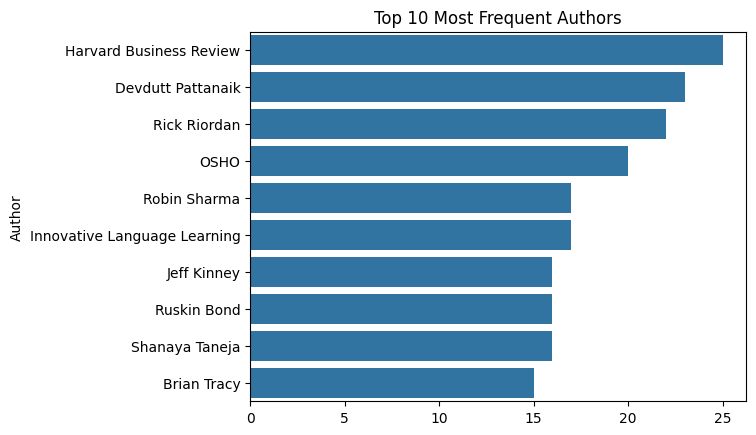

In [313]:
# Plot the top 10 most frequent authors
top_authors = author_counts.head(10)
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title("Top 10 Most Frequent Authors")
plt.show()

#### Description (Text Column)

In [314]:
# Missing descriptions
print(f"Number of missing descriptions: {df_final['Description'].isna().sum()}")


Number of missing descriptions: 0


In [315]:
# Word frequency in descriptions
all_desc_words = ' '.join(df_final['Description'].dropna()).split()
desc_word_freq = Counter(all_desc_words)
common_desc_words = desc_word_freq.most_common(10)
print("Top 10 most frequent words in descriptions:", common_desc_words)

Top 10 most frequent words in descriptions: [('the', 5613), ('to', 5017), ('and', 4243), ('of', 3794), ('a', 3525), ('is', 2546), ('in', 2129), ('make', 1760), ('sure', 1650), ('not', 1459)]


#### Rating (Numerical Column)

In [316]:
# Summary statistics for ratings
print(df_final['Rating'].describe())

count    3593.000000
mean        3.928709
std         1.638478
min        -1.000000
25%         4.200000
50%         4.500000
75%         4.600000
max         5.000000
Name: Rating, dtype: float64


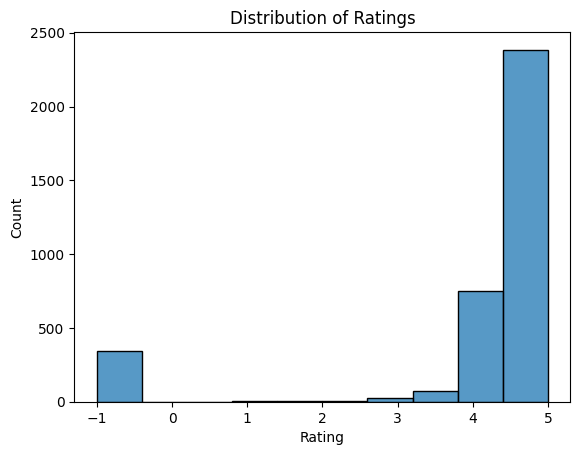

In [317]:
# Distribution of ratings
sns.histplot(df_final['Rating'], bins=10)
plt.title("Distribution of Ratings")
plt.show()

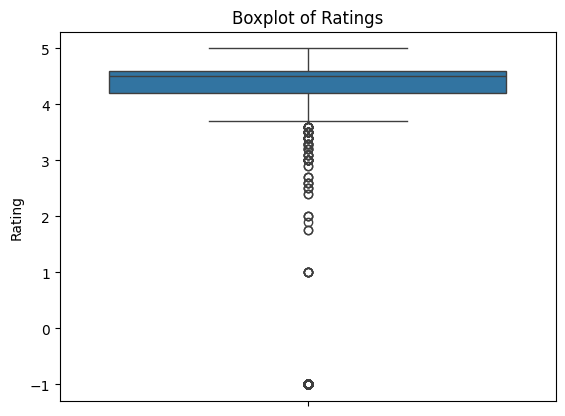

In [318]:
# Boxplot to check for outliers
sns.boxplot(df_final['Rating'])
plt.title("Boxplot of Ratings")
plt.show()

#### Number of Reviews (Numerical Column)


In [319]:
# Summary statistics for number of reviews
print(df_final['Number of Reviews'].describe())

count     3593.000000
mean      1084.623087
std       2917.043917
min          1.000000
25%         91.500000
50%        267.250000
75%        868.000000
max      70099.500000
Name: Number of Reviews, dtype: float64


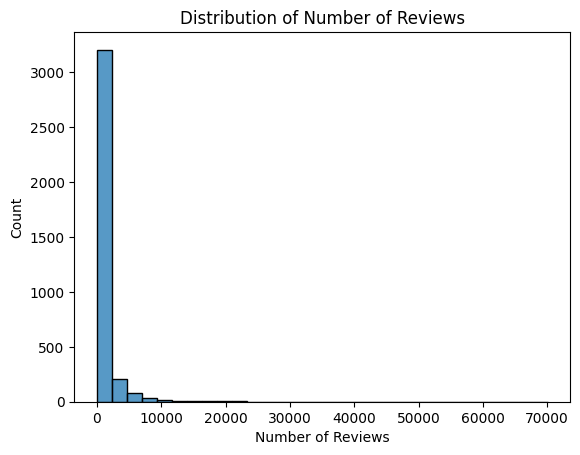

In [320]:
# Distribution of reviews
sns.histplot(df_final['Number of Reviews'], bins=30)
plt.title("Distribution of Number of Reviews")
plt.show()

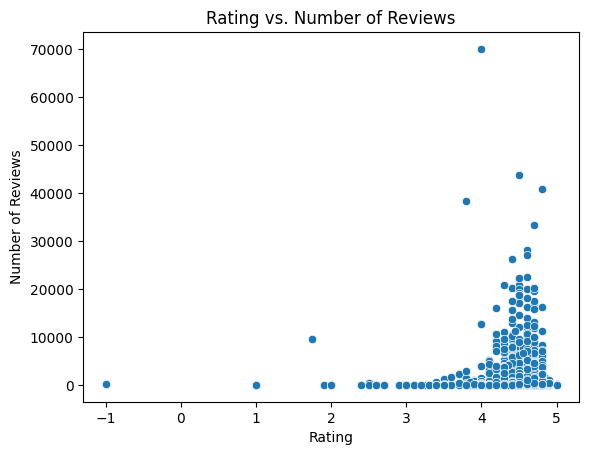

In [321]:
# Scatter plot to show relationship between rating and number of reviews
sns.scatterplot(x='Rating', y='Number of Reviews', data=df_final)
plt.title("Rating vs. Number of Reviews")
plt.show()

#### Price (Numerical Column)

In [322]:
# Summary statistics for price
print(df_final['Price'].describe())


count     3593.000000
mean       960.313387
std       1686.574834
min          0.000000
25%        501.000000
50%        683.000000
75%        888.000000
max      18290.000000
Name: Price, dtype: float64


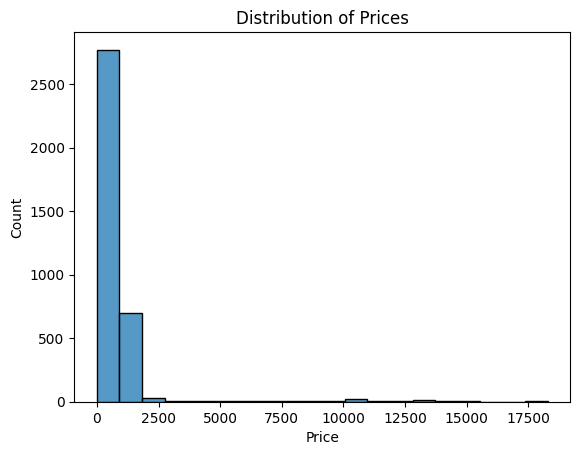

In [323]:
# Distribution of prices
sns.histplot(df_final['Price'], bins=20)
plt.title("Distribution of Prices")
plt.show()

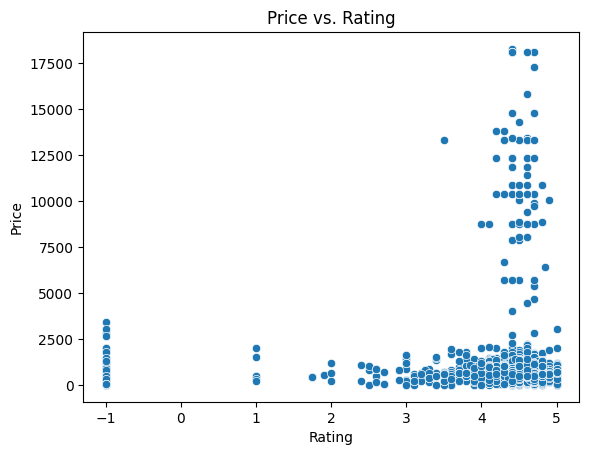

In [324]:
# Scatter plot of price vs rating
sns.scatterplot(x='Rating', y='Price', data=df_final)
plt.title("Price vs. Rating")
plt.show()

#### Rank (Numerical Column)


In [325]:
# Summary statistics for rank
print(df_final['Rank'].describe())

count    3593.000000
mean       73.085166
std       199.787009
min        -1.000000
25%        -1.000000
50%         1.000000
75%         3.000000
max       999.000000
Name: Rank, dtype: float64


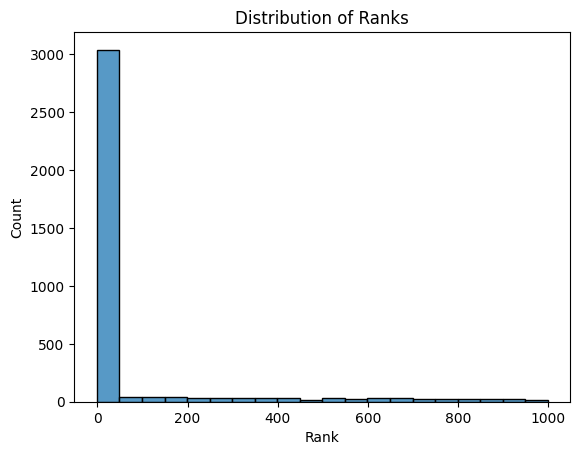

In [326]:
# Distribution of ranks
sns.histplot(df_final['Rank'], bins=20)
plt.title("Distribution of Ranks")
plt.show()

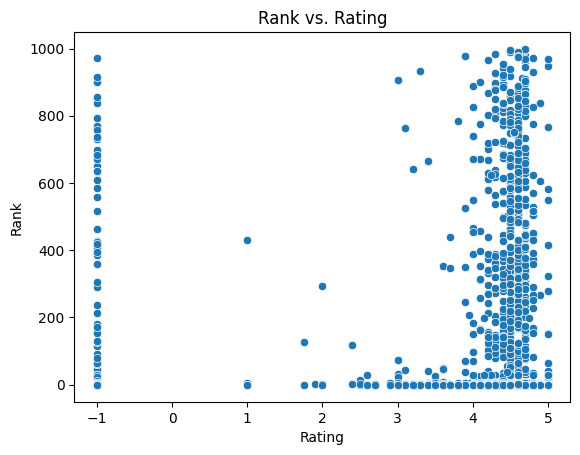

In [327]:
# Scatter plot of rank vs rating
sns.scatterplot(x='Rating', y='Rank', data=df_final)
plt.title("Rank vs. Rating")
plt.show()

#### Genre (Categorical Column)

In [328]:
df_final['Genre'].isnull().sum()

1703

In [329]:
genre_counts=df_final['Genre'].value_counts()

In [330]:
print("Top 10 genres:")
print(genre_counts.head(10))

Top 10 genres:
Genre
als)                                     198
Personal Development & Self-Help         134
Textbooks & Study Guides                 102
Analysis & Strategy                       88
Personal Success                          57
Biographies & Autobiographies (Books)     52
g                                         50
Contemporary Fiction (Books)              46
Crime, Thriller & Mystery (Books)         40
Romance (Books)                           35
Name: count, dtype: int64


In [331]:
# List of potential invalid genres
invalid_genres = ['als)', 'g']

In [332]:
df_cleaned = df_final[~df_final['Genre'].isin(invalid_genres)]

In [333]:
cleaned_genre_counts = df_cleaned['Genre'].value_counts()

In [334]:
print("Top 10 cleaned genres:")
print(cleaned_genre_counts.head(10))

Top 10 cleaned genres:
Genre
Personal Development & Self-Help         134
Textbooks & Study Guides                 102
Analysis & Strategy                       88
Personal Success                          57
Biographies & Autobiographies (Books)     52
Contemporary Fiction (Books)              46
Crime, Thriller & Mystery (Books)         40
Romance (Books)                           35
Classic Fiction (Books)                   30
d, Body & Spirit                          30
Name: count, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6984\3164075276.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_cleaned['Genre'], order=genre_counts.index[:10], palette="viridis")


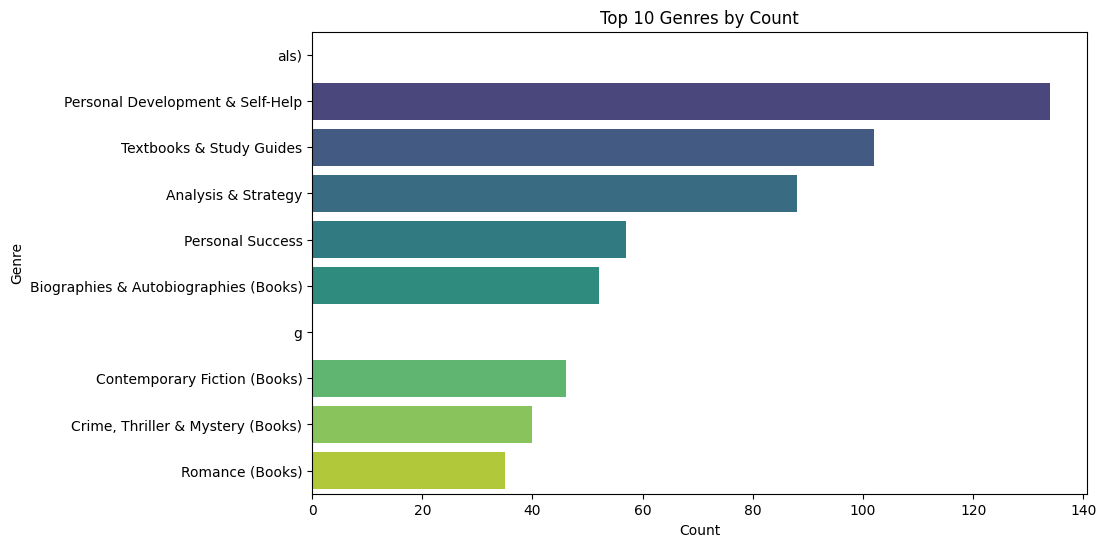

In [335]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df_cleaned['Genre'], order=genre_counts.index[:10], palette="viridis")
plt.title("Top 10 Genres by Count")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

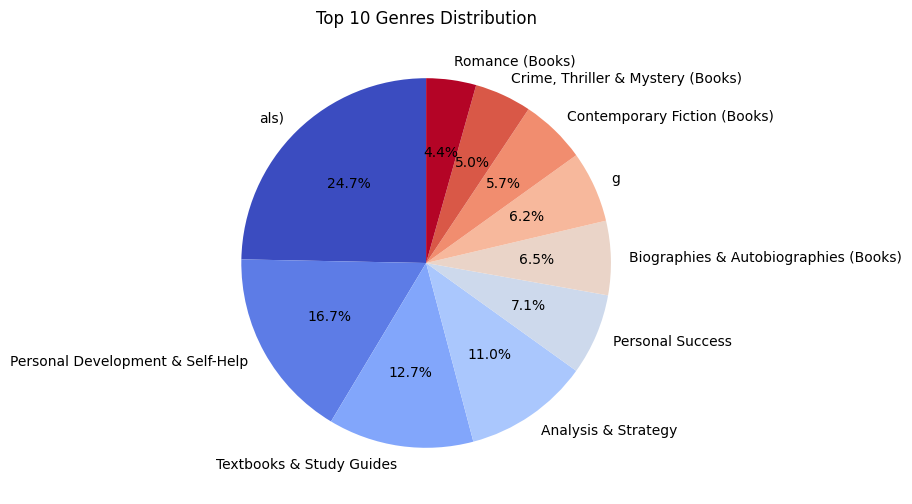

In [336]:
genre_percentage = genre_counts / len(df_cleaned) * 100
top_10_percentage = genre_percentage.head(10)

plt.figure(figsize=(8, 6))
top_10_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='coolwarm')
plt.title("Top 10 Genres Distribution")
plt.ylabel("")  # Hide the y-label
plt.show()

#### Listening Time (minutes) (Numerical Column)


In [337]:
# Summary statistics for listening time
print(df_final['Listening Time (minutes)'].describe())


count    3593.000000
mean      547.399805
std       407.130550
min         0.000000
25%       463.000000
50%       486.500000
75%       503.000000
max      6139.000000
Name: Listening Time (minutes), dtype: float64


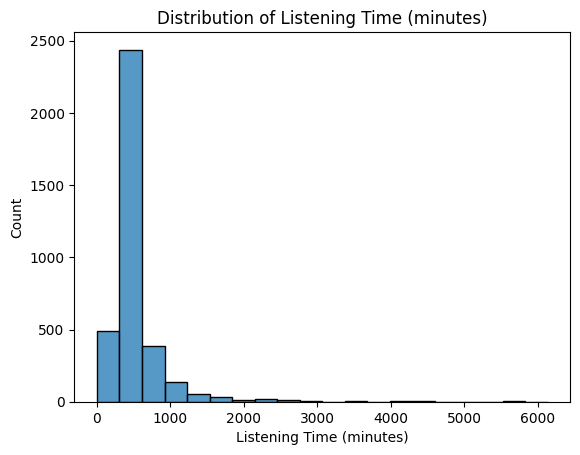

In [338]:
# Distribution of listening time
sns.histplot(df_final['Listening Time (minutes)'], bins=20)
plt.title("Distribution of Listening Time (minutes)")
plt.show()


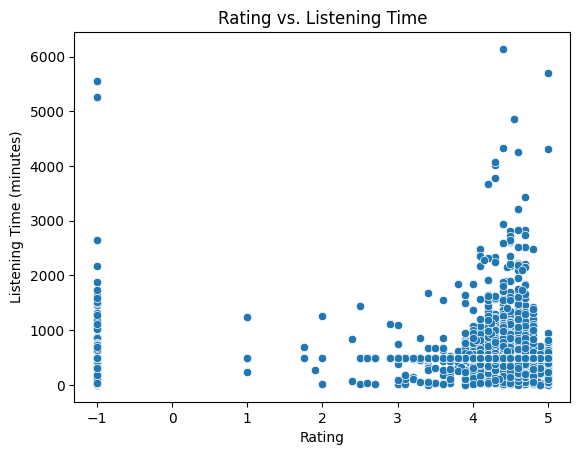

In [339]:
# Scatter plot of listening time vs rating
sns.scatterplot(x='Rating', y='Listening Time (minutes)', data=df_final)
plt.title("Rating vs. Listening Time")
plt.show()

In [340]:
df_final.columns

Index(['Book Name', 'Author', 'Description', 'Rating', 'Number of Reviews',
       'Price', 'Rank', 'Genre', 'Listening Time (minutes)'],
      dtype='object')

In [341]:
df_final.shape

(3593, 9)

#### Correlation Matrix

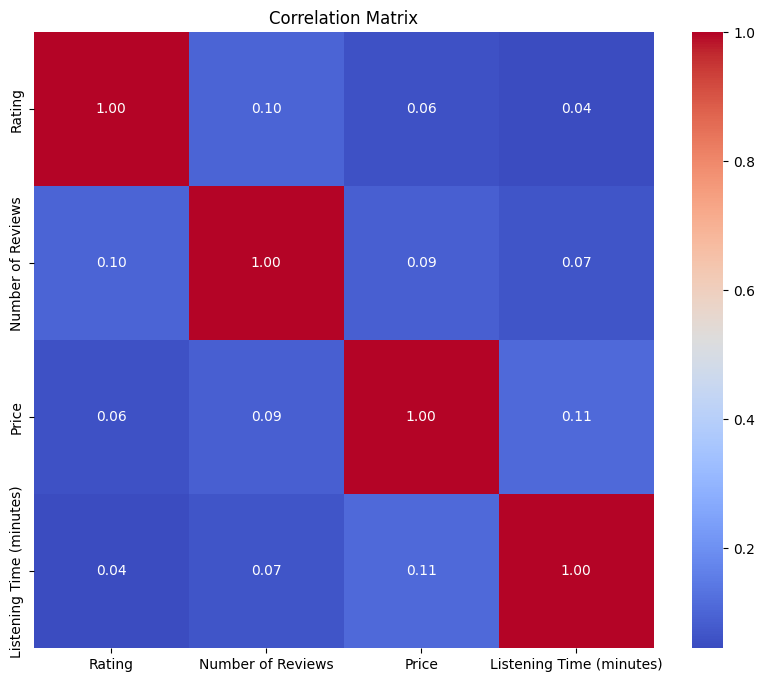

In [342]:
numerical_df = df_final.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [343]:
df_final.head()

,Book Name,Author,Description,Rating,Number of Reviews,Price,Rank,Genre,Listening Time (minutes)
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,"Over the past three years, Jay Shetty has beco...",4.9,342.0,10080.0,1,Society & Culture (Books),654.0
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,Brought to you by Penguin.,4.6,3670.0,615.0,2,Personal Success,203.0
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,"In this generation-defining self-help guide, a...",4.4,20240.0,10378.0,3,Personal Development & Self-Help,317.0
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,Brought to you by Penguin.,4.6,4646.0,888.0,5,Personal Success,335.0
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,"Stop going through life, Start growing throug...",4.6,4305.0,1005.0,6,Spiritualism,385.0


In [344]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3593 entries, 0 to 4235
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Book Name                 3593 non-null   object 
 1   Author                    3593 non-null   object 
 2   Description               3593 non-null   object 
 3   Rating                    3593 non-null   float64
 4   Number of Reviews         3593 non-null   float64
 5   Price                     3593 non-null   float64
 6   Rank                      3593 non-null   int32  
 7   Genre                     1890 non-null   object 
 8   Listening Time (minutes)  3593 non-null   float64
dtypes: float64(4), int32(1), object(4)
memory usage: 266.7+ KB


In [345]:
# Find the most frequent genre
most_frequent_genre = df_final['Genre'].mode()[0]

In [346]:
# Fill missing values with the most frequent genre
df_final['Genre'].fillna(most_frequent_genre, inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6984\3623203146.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['Genre'].fillna(most_frequent_genre, inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6984\3623203146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Genre'].fillna(most_frequent_genre, inplace=True)

In [347]:
# Check if missing values were filled
print(df_final['Genre'].isnull().sum())

0


In [348]:
df_final['Genre'].value_counts()

Genre
als)                                1901
Personal Development & Self-Help     134
Textbooks & Study Guides             102
Analysis & Strategy                   88
Personal Success                      57
                                    ... 
Crime Fiction                          1
Astrology (Books)                      1
ation Studies                          1
gs for Children                        1
Diabetes                               1
Name: count, Length: 317, dtype: int64

In [349]:
invalid_genres = ['als)', 'g']

In [350]:
df_final = df_final[~df_final['Genre'].isin(invalid_genres)]

In [351]:
print(df_final['Genre'].value_counts().head(10))

Genre
Personal Development & Self-Help         134
Textbooks & Study Guides                 102
Analysis & Strategy                       88
Personal Success                          57
Biographies & Autobiographies (Books)     52
Contemporary Fiction (Books)              46
Crime, Thriller & Mystery (Books)         40
Romance (Books)                           35
Classic Fiction (Books)                   30
d, Body & Spirit                          30
Name: count, dtype: int64


In [352]:
df_final.shape

(1642, 9)

In [353]:
df_final.to_csv(r"cleaned_book_data.csv",index=False)